<a href="https://colab.research.google.com/github/tharindu4903/Emotion-Recognition./blob/main/emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os,sys

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path="/content/drive/My Drive/wavFiles"

In [ ]:
mylist= os.listdir(path)
mylist.sort()


In [ ]:
mylist[50]

'03-01-01-01-02-01-03.wav'

In [ ]:
print(mylist[:10])

['03-01-01-01-01-01-01.wav', '03-01-01-01-01-01-02.wav', '03-01-01-01-01-01-03.wav', '03-01-01-01-01-01-04.wav', '03-01-01-01-01-01-05.wav', '03-01-01-01-01-01-06.wav', '03-01-01-01-01-01-07.wav', '03-01-01-01-01-01-08.wav', '03-01-01-01-01-01-09.wav', '03-01-01-01-01-01-10.wav']


In [ ]:
os.path.getsize(path)

4096

In [ ]:
len(mylist)

1444

In [ ]:
import librosa
import librosa.display
import os
import pandas as pd
import librosa
import glob 
import matplotlib.pyplot as plt


In [ ]:
data, sampling_rate = librosa.load("/content/drive/My Drive/wavFiles/03-01-07-02-01-02-18.wav")

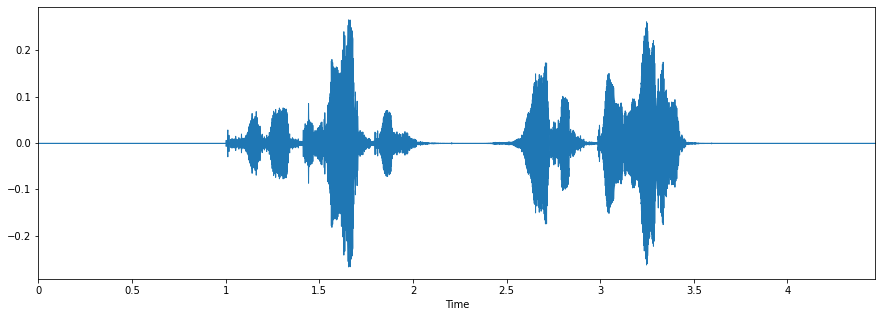

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
feelingslist=[]
for item in mylist:

    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feelingslist.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feelingslist.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feelingslist.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feelingslist.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feelingslist.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feelingslist.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feelingslist.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feelingslist.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feelingslist.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feelingslist.append('male_fearful')
  

In [ ]:
feelings = pd.DataFrame(feelingslist)

In [ ]:
feelings.head(10)

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
5,female_calm
6,male_calm
7,female_calm
8,male_calm
9,female_calm


In [ ]:
feelings.rename(columns={ feelings.columns[0]: "feeling" }, inplace = True)
feelings.groupby(['feeling']).count()

""
feeling
female_angry
female_calm
female_fearful
female_happy
female_sad
male_angry
male_calm
male_fearful
male_happy


In [ ]:
feelings.shape

(960, 1)

In [ ]:
import numpy as np

In [ ]:
ds = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]=='02' or mylist[index][6:-16]=='03' or mylist[index][6:-16]=='04' or mylist[index][6:-16]=='05' or mylist[index][6:-16]=='06' :
        X, sample_rate = librosa.load("/content/drive/My Drive/wavFiles/"+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        ds.loc[bookmark] = [feature]
        bookmark=bookmark+1 

In [ ]:
ds

,feature
0,"[-70.2677641610773, -70.2677641610773, -70.267..."
1,"[-65.70765240065282, -65.70765240065282, -63.1..."
2,"[-65.4824988827423, -65.4824988827423, -65.482..."
3,"[-64.52844910346735, -64.52844910346735, -64.5..."
4,"[-62.364310527454684, -59.934725138111325, -61..."
...,...
955,"[-31.16371172623259, -28.617667805229384, -24...."
956,"[-51.83940417046295, -51.83940417046295, -51.8..."
957,"[-49.28905111577704, -49.28905111577704, -49.0..."
958,"[-57.722848811688564, -57.722848811688564, -57..."


In [ ]:
ds = pd.DataFrame(ds['feature'].values.tolist())

In [ ]:
ds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.000654,-69.980825,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-66.096389,-63.397296,-68.259889,-70.267764,-69.665259,-68.817130,-66.114668,-63.901026,-68.620616,-70.267764,-69.641987,-68.420153,-70.044184,-67.232467,-66.350391,-68.503458,-66.577591,-62.980961,-62.693481,-65.906674,...,-40.009635,-39.582802,-41.081641,-41.831926,-43.328299,-44.810402,-46.606087,-45.476283,-48.729269,-51.778688,-51.437843,-52.643400,-54.617380,-56.556372,-56.228848,-53.642114,-52.771323,-51.568359,-54.046791,-55.942011,-54.382912,-54.097710,-52.373696,-51.012729,-53.334520,-55.215704,-57.183351,-60.704976,-57.998028,-57.542958,-58.802037,-57.447461,-58.896493,-58.751002,-57.405669,-60.078475,-63.426811,-62.638537,-61.082741,-60.234652
1,-65.707652,-65.707652,-63.114722,-61.518999,-61.097138,-63.424602,-63.720067,-56.854608,-55.168972,-54.640002,-54.665957,-56.481771,-60.643311,-60.328460,-57.369862,-57.232729,-57.068170,-58.879949,-60.869258,-60.409246,-56.475357,-56.665135,-62.891254,-62.937752,-62.721768,-63.700889,-64.900675,-65.601253,-65.707652,-64.484307,-58.541316,-56.757712,-58.845185,-59.527052,-62.947615,-62.706966,-62.271091,-62.761944,-64.267590,-63.976683,...,-35.579602,-35.359591,-35.253956,-37.159774,-37.651967,-35.556465,-34.878644,-35.944972,-36.719607,-36.811935,-32.738261,-31.717667,-30.455791,-30.440600,-30.931782,-31.105901,-31.538147,-32.097185,-32.089995,-32.066144,-32.650239,-34.368675,-35.422914,-36.077523,-36.505671,-36.909721,-37.073579,-37.348105,-37.785262,-37.423569,-38.301204,-39.792147,-40.613166,-41.209201,-41.439204,-43.994282,-49.399616,-50.591601,-49.144064,-48.705645
2,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-63.544834,-58.564128,-58.815498,-61.365042,-63.614111,-63.916549,-61.479460,-60.097606,...,-24.584314,-26.499666,-26.651818,-26.721212,-26.951989,-26.255502,-26.928432,-25.735068,-26.629108,-25.733118,-25.395233,-24.371531,-24.847430,-24.204668,-24.610710,-24.985668,-24.951147,-25.362369,-24.829263,-24.947482,-24.736843,-25.942413,-25.575700,-25.926504,-25.654657,-27.012598,-26.588637,-26.618813,-28.464279,-27.841454,-29.193261,-31.346553,-34.310774,-35.800705,-35.936112,-37.631846,-40.119408,-41.662903,-41.323644,-40.710780
3,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-65.928222,-66.952889,-67.101839,-64.861747,-64.528449,-64.664154,-64.422245,-63.988960,-62.964745,-63.364106,-63.114983,-62.966355,-58.560466,-53.020032,-50.965662,-51.447620,-55.544659,-57.609123,-57.910354,-56.151866,-58.911752,-60.747170,-63.577906,-63.201216,-63.872219,-64.830210,-64.734194,-64.544041,-64.528449,-64.579850,-63.967143,...,-39.380392,-37.836809,-38.648036,-37.805902,-36.556047,-36.094294,-36.698536,-37.363729,-37.141013,-37.746508,-37.971316,-40.085141,-40.125057,-39.117487,-38.866413,-40.057305,-40.405938,-42.202967,-44.230122,-43.217095,-44.287004,-42.121836,-42.452925,-43.482843,-46.946009,-47.883193,-48.570569,-49.758724,-50.337285,-49.692481,-48.872007,-48.674306,-48.596082,-47.602751,-43.049195,-42.659546,-43.188561,-44.001237,-43.610100,-44.698259
4,-62.364311,-59.934725,-61.869600,-67.495764,-71.071811,-65.679826,-63.394396,-65.503349,-61.856639,-60.005421,-62.684183,-59.804294,-55.818539,-57.884946,-57.003727,-56.189770,-58

In [ ]:
newds = pd.concat([ds,feelings], axis=1)

In [ ]:
newds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,feeling
0,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.000654,-69.980825,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-66.096389,-63.397296,-68.259889,-70.267764,-69.665259,-68.817130,-66.114668,-63.901026,-68.620616,-70.267764,-69.641987,-68.420153,-70.044184,-67.232467,-66.350391,-68.503458,-66.577591,-62.980961,-62.693481,-65.906674,...,-39.582802,-41.081641,-41.831926,-43.328299,-44.810402,-46.606087,-45.476283,-48.729269,-51.778688,-51.437843,-52.643400,-54.617380,-56.556372,-56.228848,-53.642114,-52.771323,-51.568359,-54.046791,-55.942011,-54.382912,-54.097710,-52.373696,-51.012729,-53.334520,-55.215704,-57.183351,-60.704976,-57.998028,-57.542958,-58.802037,-57.447461,-58.896493,-58.751002,-57.405669,-60.078475,-63.426811,-62.638537,-61.082741,-60.234652,male_calm
1,-65.707652,-65.707652,-63.114722,-61.518999,-61.097138,-63.424602,-63.720067,-56.854608,-55.168972,-54.640002,-54.665957,-56.481771,-60.643311,-60.328460,-57.369862,-57.232729,-57.068170,-58.879949,-60.869258,-60.409246,-56.475357,-56.665135,-62.891254,-62.937752,-62.721768,-63.700889,-64.900675,-65.601253,-65.707652,-64.484307,-58.541316,-56.757712,-58.845185,-59.527052,-62.947615,-62.706966,-62.271091,-62.761944,-64.267590,-63.976683,...,-35.359591,-35.253956,-37.159774,-37.651967,-35.556465,-34.878644,-35.944972,-36.719607,-36.811935,-32.738261,-31.717667,-30.455791,-30.440600,-30.931782,-31.105901,-31.538147,-32.097185,-32.089995,-32.066144,-32.650239,-34.368675,-35.422914,-36.077523,-36.505671,-36.909721,-37.073579,-37.348105,-37.785262,-37.423569,-38.301204,-39.792147,-40.613166,-41.209201,-41.439204,-43.994282,-49.399616,-50.591601,-49.144064,-48.705645,female_calm
2,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-63.544834,-58.564128,-58.815498,-61.365042,-63.614111,-63.916549,-61.479460,-60.097606,...,-26.499666,-26.651818,-26.721212,-26.951989,-26.255502,-26.928432,-25.735068,-26.629108,-25.733118,-25.395233,-24.371531,-24.847430,-24.204668,-24.610710,-24.985668,-24.951147,-25.362369,-24.829263,-24.947482,-24.736843,-25.942413,-25.575700,-25.926504,-25.654657,-27.012598,-26.588637,-26.618813,-28.464279,-27.841454,-29.193261,-31.346553,-34.310774,-35.800705,-35.936112,-37.631846,-40.119408,-41.662903,-41.323644,-40.710780,male_calm
3,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-65.928222,-66.952889,-67.101839,-64.861747,-64.528449,-64.664154,-64.422245,-63.988960,-62.964745,-63.364106,-63.114983,-62.966355,-58.560466,-53.020032,-50.965662,-51.447620,-55.544659,-57.609123,-57.910354,-56.151866,-58.911752,-60.747170,-63.577906,-63.201216,-63.872219,-64.830210,-64.734194,-64.544041,-64.528449,-64.579850,-63.967143,...,-37.836809,-38.648036,-37.805902,-36.556047,-36.094294,-36.698536,-37.363729,-37.141013,-37.746508,-37.971316,-40.085141,-40.125057,-39.117487,-38.866413,-40.057305,-40.405938,-42.202967,-44.230122,-43.217095,-44.287004,-42.121836,-42.452925,-43.482843,-46.946009,-47.883193,-48.570569,-49.758724,-50.337285,-49.692481,-48.872007,-48.674306,-48.596082,-47.602751,-43.049195,-42.659546,-43.188561,-44.001237,-43.610100,-44.698259,female_calm
4,-62.364311,-59.934725,-61.869600,-67.495764,-71.071811,-65.679826,-63.394396,-65.503349,-61.856639,-60.005421,-62.684183,-59.804294,-55.818539,-57.884946,-57.003727,-56.189770

ADDING NOISE


In [ ]:
ds1 = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]=='02' or mylist[index][6:-16]=='03' or mylist[index][6:-16]=='04' or mylist[index][6:-16]=='05' or mylist[index][6:-16]=='06' :
        X, sample_rate = librosa.load("/content/drive/My Drive/wavFiles/"+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
        feature = mfccs
        ds1.loc[bookmark] = [feature]
        bookmark=bookmark+1 

In [ ]:
ds1 = pd.DataFrame(ds1['feature'].values.tolist())

In [ ]:
newds1 = pd.concat([ds1,feelings], axis=1)

In [ ]:
newds1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,feeling
0,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.000654,-69.980825,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-66.096389,-63.397296,-68.259889,-70.267764,-69.665259,-68.817130,-66.114668,-63.901026,-68.620616,-70.267764,-69.641987,-68.420153,-70.044184,-67.232467,-66.350391,-68.503458,-66.577591,-62.980961,-62.693481,-65.906674,...,-39.582802,-41.081641,-41.831926,-43.328299,-44.810402,-46.606087,-45.476283,-48.729269,-51.778688,-51.437843,-52.643400,-54.617380,-56.556372,-56.228848,-53.642114,-52.771323,-51.568359,-54.046791,-55.942011,-54.382912,-54.097710,-52.373696,-51.012729,-53.334520,-55.215704,-57.183351,-60.704976,-57.998028,-57.542958,-58.802037,-57.447461,-58.896493,-58.751002,-57.405669,-60.078475,-63.426811,-62.638537,-61.082741,-60.234652,male_calm
1,-65.707652,-65.707652,-63.114722,-61.518999,-61.097138,-63.424602,-63.720067,-56.854608,-55.168972,-54.640002,-54.665957,-56.481771,-60.643311,-60.328460,-57.369862,-57.232729,-57.068170,-58.879949,-60.869258,-60.409246,-56.475357,-56.665135,-62.891254,-62.937752,-62.721768,-63.700889,-64.900675,-65.601253,-65.707652,-64.484307,-58.541316,-56.757712,-58.845185,-59.527052,-62.947615,-62.706966,-62.271091,-62.761944,-64.267590,-63.976683,...,-35.359591,-35.253956,-37.159774,-37.651967,-35.556465,-34.878644,-35.944972,-36.719607,-36.811935,-32.738261,-31.717667,-30.455791,-30.440600,-30.931782,-31.105901,-31.538147,-32.097185,-32.089995,-32.066144,-32.650239,-34.368675,-35.422914,-36.077523,-36.505671,-36.909721,-37.073579,-37.348105,-37.785262,-37.423569,-38.301204,-39.792147,-40.613166,-41.209201,-41.439204,-43.994282,-49.399616,-50.591601,-49.144064,-48.705645,female_calm
2,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-63.544834,-58.564128,-58.815498,-61.365042,-63.614111,-63.916549,-61.479460,-60.097606,...,-26.499666,-26.651818,-26.721212,-26.951989,-26.255502,-26.928432,-25.735068,-26.629108,-25.733118,-25.395233,-24.371531,-24.847430,-24.204668,-24.610710,-24.985668,-24.951147,-25.362369,-24.829263,-24.947482,-24.736843,-25.942413,-25.575700,-25.926504,-25.654657,-27.012598,-26.588637,-26.618813,-28.464279,-27.841454,-29.193261,-31.346553,-34.310774,-35.800705,-35.936112,-37.631846,-40.119408,-41.662903,-41.323644,-40.710780,male_calm
3,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-65.928222,-66.952889,-67.101839,-64.861747,-64.528449,-64.664154,-64.422245,-63.988960,-62.964745,-63.364106,-63.114983,-62.966355,-58.560466,-53.020032,-50.965662,-51.447620,-55.544659,-57.609123,-57.910354,-56.151866,-58.911752,-60.747170,-63.577906,-63.201216,-63.872219,-64.830210,-64.734194,-64.544041,-64.528449,-64.579850,-63.967143,...,-37.836809,-38.648036,-37.805902,-36.556047,-36.094294,-36.698536,-37.363729,-37.141013,-37.746508,-37.971316,-40.085141,-40.125057,-39.117487,-38.866413,-40.057305,-40.405938,-42.202967,-44.230122,-43.217095,-44.287004,-42.121836,-42.452925,-43.482843,-46.946009,-47.883193,-48.570569,-49.758724,-50.337285,-49.692481,-48.872007,-48.674306,-48.596082,-47.602751,-43.049195,-42.659546,-43.188561,-44.001237,-43.610100,-44.698259,female_calm
4,-62.364311,-59.934725,-61.869600,-67.495764,-71.071811,-65.679826,-63.394396,-65.503349,-61.856639,-60.005421,-62.684183,-59.804294,-55.818539,-57.884946,-57.003727,-56.189770

In [ ]:
ds_new=pd.concat([newds, newds1], ignore_index=True)

In [ ]:
newds=ds_new

end


In [ ]:
newds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,feeling
0,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.000654,-69.980825,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-66.096389,-63.397296,-68.259889,-70.267764,-69.665259,-68.817130,-66.114668,-63.901026,-68.620616,-70.267764,-69.641987,-68.420153,-70.044184,-67.232467,-66.350391,-68.503458,-66.577591,-62.980961,-62.693481,-65.906674,...,-39.582802,-41.081641,-41.831926,-43.328299,-44.810402,-46.606087,-45.476283,-48.729269,-51.778688,-51.437843,-52.643400,-54.617380,-56.556372,-56.228848,-53.642114,-52.771323,-51.568359,-54.046791,-55.942011,-54.382912,-54.097710,-52.373696,-51.012729,-53.334520,-55.215704,-57.183351,-60.704976,-57.998028,-57.542958,-58.802037,-57.447461,-58.896493,-58.751002,-57.405669,-60.078475,-63.426811,-62.638537,-61.082741,-60.234652,male_calm
1,-65.707652,-65.707652,-63.114722,-61.518999,-61.097138,-63.424602,-63.720067,-56.854608,-55.168972,-54.640002,-54.665957,-56.481771,-60.643311,-60.328460,-57.369862,-57.232729,-57.068170,-58.879949,-60.869258,-60.409246,-56.475357,-56.665135,-62.891254,-62.937752,-62.721768,-63.700889,-64.900675,-65.601253,-65.707652,-64.484307,-58.541316,-56.757712,-58.845185,-59.527052,-62.947615,-62.706966,-62.271091,-62.761944,-64.267590,-63.976683,...,-35.359591,-35.253956,-37.159774,-37.651967,-35.556465,-34.878644,-35.944972,-36.719607,-36.811935,-32.738261,-31.717667,-30.455791,-30.440600,-30.931782,-31.105901,-31.538147,-32.097185,-32.089995,-32.066144,-32.650239,-34.368675,-35.422914,-36.077523,-36.505671,-36.909721,-37.073579,-37.348105,-37.785262,-37.423569,-38.301204,-39.792147,-40.613166,-41.209201,-41.439204,-43.994282,-49.399616,-50.591601,-49.144064,-48.705645,female_calm
2,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-65.482499,-63.544834,-58.564128,-58.815498,-61.365042,-63.614111,-63.916549,-61.479460,-60.097606,...,-26.499666,-26.651818,-26.721212,-26.951989,-26.255502,-26.928432,-25.735068,-26.629108,-25.733118,-25.395233,-24.371531,-24.847430,-24.204668,-24.610710,-24.985668,-24.951147,-25.362369,-24.829263,-24.947482,-24.736843,-25.942413,-25.575700,-25.926504,-25.654657,-27.012598,-26.588637,-26.618813,-28.464279,-27.841454,-29.193261,-31.346553,-34.310774,-35.800705,-35.936112,-37.631846,-40.119408,-41.662903,-41.323644,-40.710780,male_calm
3,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-64.528449,-65.928222,-66.952889,-67.101839,-64.861747,-64.528449,-64.664154,-64.422245,-63.988960,-62.964745,-63.364106,-63.114983,-62.966355,-58.560466,-53.020032,-50.965662,-51.447620,-55.544659,-57.609123,-57.910354,-56.151866,-58.911752,-60.747170,-63.577906,-63.201216,-63.872219,-64.830210,-64.734194,-64.544041,-64.528449,-64.579850,-63.967143,...,-37.836809,-38.648036,-37.805902,-36.556047,-36.094294,-36.698536,-37.363729,-37.141013,-37.746508,-37.971316,-40.085141,-40.125057,-39.117487,-38.866413,-40.057305,-40.405938,-42.202967,-44.230122,-43.217095,-44.287004,-42.121836,-42.452925,-43.482843,-46.946009,-47.883193,-48.570569,-49.758724,-50.337285,-49.692481,-48.872007,-48.674306,-48.596082,-47.602751,-43.049195,-42.659546,-43.188561,-44.001237,-43.610100,-44.698259,female_calm
4,-62.364311,-59.934725,-61.869600,-67.495764,-71.071811,-65.679826,-63.394396,-65.503349,-61.856639,-60.005421,-62.684183,-59.804294,-55.818539,-57.884946,-57.003727,-56.189770

In [ ]:
from sklearn.utils import shuffle
newds = shuffle(newds)

In [ ]:
newds=newds.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train,test=train_test_split(newds,test_size=0.2)

In [ ]:
train.shape


(1536, 217)

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,feeling
1385,-60.111047,-61.029229,-61.176234,-59.588841,-59.777593,-64.749013,-65.478377,-65.936020,-65.936020,-65.658403,-64.650685,-65.900716,-65.936020,-65.936020,-65.936020,-64.937511,-65.020512,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.345147,...,-32.924296,-32.410222,-31.235873,-27.998826,-29.275943,-32.448251,-34.227343,-32.169722,-34.429911,-37.504278,-36.216533,-33.603303,-31.802995,-33.279299,-37.546651,-39.194583,-40.903677,-42.455393,-40.344965,-40.570566,-42.060783,-43.366586,-47.072233,-46.883837,-49.927762,-52.854257,-52.147998,-51.418400,-52.908483,-54.246579,-57.763133,-58.641915,-58.699720,-59.235367,-58.163311,-57.925119,-55.651804,-53.468274,-53.758019,female_sad
1231,-50.789176,-50.067207,-49.285804,-49.017008,-49.469657,-52.921278,-50.415518,-50.706373,-53.524490,-53.321019,-53.984827,-54.825270,-59.422479,-59.301126,-57.777474,-54.333829,-53.488869,-53.184622,-49.657432,-50.484011,-50.506228,-50.465230,-50.441491,-51.039420,-49.360015,-49.617069,-51.380089,-52.416923,-53.254327,-52.378069,-53.226266,-52.677564,-53.486889,-53.745201,-52.347493,-51.968090,-53.550576,-51.749723,-52.030029,-54.078796,...,-39.517482,-40.501770,-43.894151,-43.234979,-43.109527,-43.942461,-44.294314,-45.903172,-47.008106,-44.752451,-45.941430,-49.941993,-49.955068,-48.850968,-46.922088,-46.201186,-49.578884,-50.514386,-50.121523,-49.003395,-49.541043,-50.469575,-49.132841,-49.587603,-49.990271,-51.576782,-51.455401,-50.679398,-50.570073,-52.379714,-52.870943,-52.720015,-53.833102,-55.254180,-54.526437,-55.669941,-57.299128,-55.355680,-54.877544,female_happy
743,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.314025,-51.323530,-51.322532,-51.801724,-51.704298,-51.283867,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.221631,-51.238853,-51.238853,-51.144512,-50.697135,-50.667099,-49.492666,-47.126768,...,-30.945346,-33.295010,-33.361792,-32.081330,-31.790061,-31.597716,-30.363203,-30.655499,-32.462670,-29.321916,-28.475717,-30.182235,-30.639430,-30.878030,-29.856122,-30.403227,-32.999402,-36.201636,-36.090708,-23.567941,-20.003664,-22.623198,-28.376674,-31.476936,-32.090782,-31.557648,-32.654404,-31.182050,-31.165186,-30.909138,-31.397684,-31.591695,-31.171774,-31.109154,-29.905584,-30.231249,-32.239303,-28.178909,-21.513432,female_angry
1172,-56.696596,-56.882877,-57.239154,-57.443418,-57.447678,-57.447678,-57.447678,-57.447678,-56.860611,-55.090668,-55.574805,-56.842530,-57.447678,-57.447678,-57.288870,-55.422699,-52.437401,-50.812048,-52.041165,-53.077669,-53.357138,-53.503092,-52.817956,-54.054442,-56.410167,-56.868990,-56.475733,-56.319747,-56.365025,-56.598832,-56.418498,-56.078498,-54.815483,-54.556011,-55.611179,-57.447678,-56.170575,-52.920797,-53.276421,-54.636134,...,-22.251387,-21.080706,-19.748537,-19.707276,-21.092543,-21.441797,-21.842077,-23.318301,-22.623384,-23.444660,-24.620417,-24.796436,-25.550229,-26.692725,-28.115566,-29.408460,-30.323387,-31.863433,-29.529747,-30.615318,-29.283530,-31.276670,-35.444989,-33.730245,-35.024825,-34.428967,-34.789972,-35.875400,-38.502932,-42.032540,-43.694283,-43.168214,-44.273263,-44.549386,-46.690414,-45.332038,-45.653286,-49.467001,-51.899394,male_happy
394,-55.078257,-53.478256,-51.626601,-51.304680,-52.687812,-53.223848,-54.573266,-57.562159,-56.188602,-56.307330,-54.398595,-55.214208,-55.482992,-55.412825,-57.

In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,feeling
55,-62.298930,-58.117090,-52.514487,-49.665774,-50.454321,-52.708807,-52.650165,-51.722148,-51.405099,-55.263349,-56.825550,-53.257763,-52.634785,-52.847732,-51.433080,-50.243416,-49.438254,-49.673592,-52.262913,-54.521225,-60.114948,-55.432471,-54.430929,-54.115918,-52.321819,-53.637581,-53.361811,-55.103772,-55.114713,-53.304426,-55.354968,-55.593480,-54.170523,-52.519152,-54.568213,-52.104940,-50.949339,-51.977698,-52.314503,-52.124418,...,-35.054922,-38.374907,-40.312570,-42.774118,-41.842352,-40.418722,-42.013041,-44.026417,-45.881784,-47.347494,-47.034577,-47.151247,-45.390696,-46.859672,-49.008412,-49.407763,-50.540449,-50.839817,-50.324319,-51.010339,-50.367275,-50.058933,-51.886418,-50.714978,-51.614204,-49.697684,-51.237484,-51.905410,-52.749809,-56.397871,-56.931351,-53.773379,-54.971037,-54.666141,-52.075011,-51.310909,-53.125411,-53.229084,-52.692552,female_calm
1431,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.144540,-62.237269,-60.704477,...,-39.856095,-41.188259,-43.077861,-44.171973,-43.827005,-44.139998,-45.400961,-47.920466,-48.717296,-47.853097,-49.183232,-49.794070,-51.705324,-53.347897,-52.806086,-52.548414,-53.612684,-55.591015,-55.480542,-55.048489,-56.453171,-54.620854,-52.903366,-50.911346,-51.912329,-54.381975,-54.489939,-56.203848,-57.820998,-59.867067,-59.519984,-59.306837,-58.755400,-59.799858,-58.920172,-60.878159,-62.100041,-60.260030,-59.630258,female_sad
1285,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-50.604459,-50.598416,-50.653321,-50.414038,-49.908194,-49.335915,-47.548252,-47.827543,-48.628702,-48.093534,-45.742792,-44.566176,-44.760899,-44.322003,-42.389354,-43.267666,-43.662193,-43.612054,-44.192128,-45.162938,-43.725611,-44.222974,-44.951887,-42.949651,-43.697850,-46.627753,...,-40.125588,-40.733841,-39.243404,-35.807355,-34.925070,-36.784667,-37.024704,-34.885924,-35.829243,-36.846725,-36.514465,-39.067423,-37.977553,-39.388040,-42.728950,-42.915946,-42.868022,-43.309593,-43.798167,-45.546488,-43.805261,-43.355019,-45.160902,-46.665306,-46.836522,-46.437193,-46.846233,-45.953475,-43.474130,-44.259475,-46.396792,-46.980416,-47.729053,-48.044350,-47.767132,-48.797279,-49.197687,-49.197687,-49.008380,female_happy
1770,-64.818508,-64.818508,-62.839227,-61.646168,-61.751814,-61.417268,-60.464655,-62.012210,-64.297472,-64.105843,-64.497280,-64.818508,-64.818508,-64.374662,-58.717395,-55.781020,-53.936424,-53.850908,-54.125783,-53.188698,-54.174802,-58.195614,-60.246994,-56.556777,-52.985738,-51.696824,-51.650920,-51.719087,-50.805682,-51.103948,-53.279814,-54.326590,-55.072095,-56.023110,-57.720774,-59.969099,-62.207710,-63.002086,-63.038882,-59.841239,...,-30.578464,-32.849309,-34.385420,-36.006967,-39.660648,-39.512069,-35.817831,-34.825335,-37.041738,-34.070013,-33.766179,-35.065964,-38.085173,-40.177818,-40.738061,-41.621323,-43.672707,-45.247069,-44.984281,-43.079290,-43.211992,-44.936317,-43.016564,-43.152503,-44.065879,-41.510423,-41.377153,-43.470570,-42.251722,-42.345956,-44.364982,-46.559088,-45.602323,-45.404999,-46.463757,-47.265265,-46.711232,-46.464118,-49.998989,male_fearful
1284,-57.756826,-56.945218,-55.402335,-54.326853,-54.621980,-55.201250,-57.895613,-57.895613,-56.603973,-56.500033,-56.953741,-55.688518,-55.474115,-55.466321,-54

In [ ]:
X_train=train.iloc[:, :-1]
X_test=test.iloc[:, :-1]

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
1385,-60.111047,-61.029229,-61.176234,-59.588841,-59.777593,-64.749013,-65.478377,-65.936020,-65.936020,-65.658403,-64.650685,-65.900716,-65.936020,-65.936020,-65.936020,-64.937511,-65.020512,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.936020,-65.345147,...,-32.989288,-32.924296,-32.410222,-31.235873,-27.998826,-29.275943,-32.448251,-34.227343,-32.169722,-34.429911,-37.504278,-36.216533,-33.603303,-31.802995,-33.279299,-37.546651,-39.194583,-40.903677,-42.455393,-40.344965,-40.570566,-42.060783,-43.366586,-47.072233,-46.883837,-49.927762,-52.854257,-52.147998,-51.418400,-52.908483,-54.246579,-57.763133,-58.641915,-58.699720,-59.235367,-58.163311,-57.925119,-55.651804,-53.468274,-53.758019
1231,-50.789176,-50.067207,-49.285804,-49.017008,-49.469657,-52.921278,-50.415518,-50.706373,-53.524490,-53.321019,-53.984827,-54.825270,-59.422479,-59.301126,-57.777474,-54.333829,-53.488869,-53.184622,-49.657432,-50.484011,-50.506228,-50.465230,-50.441491,-51.039420,-49.360015,-49.617069,-51.380089,-52.416923,-53.254327,-52.378069,-53.226266,-52.677564,-53.486889,-53.745201,-52.347493,-51.968090,-53.550576,-51.749723,-52.030029,-54.078796,...,-42.321143,-39.517482,-40.501770,-43.894151,-43.234979,-43.109527,-43.942461,-44.294314,-45.903172,-47.008106,-44.752451,-45.941430,-49.941993,-49.955068,-48.850968,-46.922088,-46.201186,-49.578884,-50.514386,-50.121523,-49.003395,-49.541043,-50.469575,-49.132841,-49.587603,-49.990271,-51.576782,-51.455401,-50.679398,-50.570073,-52.379714,-52.870943,-52.720015,-53.833102,-55.254180,-54.526437,-55.669941,-57.299128,-55.355680,-54.877544
743,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.314025,-51.323530,-51.322532,-51.801724,-51.704298,-51.283867,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.238853,-51.221631,-51.238853,-51.238853,-51.144512,-50.697135,-50.667099,-49.492666,-47.126768,...,-29.892322,-30.945346,-33.295010,-33.361792,-32.081330,-31.790061,-31.597716,-30.363203,-30.655499,-32.462670,-29.321916,-28.475717,-30.182235,-30.639430,-30.878030,-29.856122,-30.403227,-32.999402,-36.201636,-36.090708,-23.567941,-20.003664,-22.623198,-28.376674,-31.476936,-32.090782,-31.557648,-32.654404,-31.182050,-31.165186,-30.909138,-31.397684,-31.591695,-31.171774,-31.109154,-29.905584,-30.231249,-32.239303,-28.178909,-21.513432
1172,-56.696596,-56.882877,-57.239154,-57.443418,-57.447678,-57.447678,-57.447678,-57.447678,-56.860611,-55.090668,-55.574805,-56.842530,-57.447678,-57.447678,-57.288870,-55.422699,-52.437401,-50.812048,-52.041165,-53.077669,-53.357138,-53.503092,-52.817956,-54.054442,-56.410167,-56.868990,-56.475733,-56.319747,-56.365025,-56.598832,-56.418498,-56.078498,-54.815483,-54.556011,-55.611179,-57.447678,-56.170575,-52.920797,-53.276421,-54.636134,...,-21.605665,-22.251387,-21.080706,-19.748537,-19.707276,-21.092543,-21.441797,-21.842077,-23.318301,-22.623384,-23.444660,-24.620417,-24.796436,-25.550229,-26.692725,-28.115566,-29.408460,-30.323387,-31.863433,-29.529747,-30.615318,-29.283530,-31.276670,-35.444989,-33.730245,-35.024825,-34.428967,-34.789972,-35.875400,-38.502932,-42.032540,-43.694283,-43.168214,-44.273263,-44.549386,-46.690414,-45.332038,-45.653286,-49.467001,-51.899394
394,-55.078257,-53.478256,-51.626601,-51.304680,-52.687812,-53.223848,-54.573266,-57.562159,-56.188602,-56.307330,-54.398595,-55.214208,-55.482992,-55.412825,-57.995322,-

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
55,-62.298930,-58.117090,-52.514487,-49.665774,-50.454321,-52.708807,-52.650165,-51.722148,-51.405099,-55.263349,-56.825550,-53.257763,-52.634785,-52.847732,-51.433080,-50.243416,-49.438254,-49.673592,-52.262913,-54.521225,-60.114948,-55.432471,-54.430929,-54.115918,-52.321819,-53.637581,-53.361811,-55.103772,-55.114713,-53.304426,-55.354968,-55.593480,-54.170523,-52.519152,-54.568213,-52.104940,-50.949339,-51.977698,-52.314503,-52.124418,...,-34.458918,-35.054922,-38.374907,-40.312570,-42.774118,-41.842352,-40.418722,-42.013041,-44.026417,-45.881784,-47.347494,-47.034577,-47.151247,-45.390696,-46.859672,-49.008412,-49.407763,-50.540449,-50.839817,-50.324319,-51.010339,-50.367275,-50.058933,-51.886418,-50.714978,-51.614204,-49.697684,-51.237484,-51.905410,-52.749809,-56.397871,-56.931351,-53.773379,-54.971037,-54.666141,-52.075011,-51.310909,-53.125411,-53.229084,-52.692552
1431,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.442604,-63.144540,-62.237269,-60.704477,...,-37.753994,-39.856095,-41.188259,-43.077861,-44.171973,-43.827005,-44.139998,-45.400961,-47.920466,-48.717296,-47.853097,-49.183232,-49.794070,-51.705324,-53.347897,-52.806086,-52.548414,-53.612684,-55.591015,-55.480542,-55.048489,-56.453171,-54.620854,-52.903366,-50.911346,-51.912329,-54.381975,-54.489939,-56.203848,-57.820998,-59.867067,-59.519984,-59.306837,-58.755400,-59.799858,-58.920172,-60.878159,-62.100041,-60.260030,-59.630258
1285,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-49.197687,-50.604459,-50.598416,-50.653321,-50.414038,-49.908194,-49.335915,-47.548252,-47.827543,-48.628702,-48.093534,-45.742792,-44.566176,-44.760899,-44.322003,-42.389354,-43.267666,-43.662193,-43.612054,-44.192128,-45.162938,-43.725611,-44.222974,-44.951887,-42.949651,-43.697850,-46.627753,...,-41.061580,-40.125588,-40.733841,-39.243404,-35.807355,-34.925070,-36.784667,-37.024704,-34.885924,-35.829243,-36.846725,-36.514465,-39.067423,-37.977553,-39.388040,-42.728950,-42.915946,-42.868022,-43.309593,-43.798167,-45.546488,-43.805261,-43.355019,-45.160902,-46.665306,-46.836522,-46.437193,-46.846233,-45.953475,-43.474130,-44.259475,-46.396792,-46.980416,-47.729053,-48.044350,-47.767132,-48.797279,-49.197687,-49.197687,-49.008380
1770,-64.818508,-64.818508,-62.839227,-61.646168,-61.751814,-61.417268,-60.464655,-62.012210,-64.297472,-64.105843,-64.497280,-64.818508,-64.818508,-64.374662,-58.717395,-55.781020,-53.936424,-53.850908,-54.125783,-53.188698,-54.174802,-58.195614,-60.246994,-56.556777,-52.985738,-51.696824,-51.650920,-51.719087,-50.805682,-51.103948,-53.279814,-54.326590,-55.072095,-56.023110,-57.720774,-59.969099,-62.207710,-63.002086,-63.038882,-59.841239,...,-31.056866,-30.578464,-32.849309,-34.385420,-36.006967,-39.660648,-39.512069,-35.817831,-34.825335,-37.041738,-34.070013,-33.766179,-35.065964,-38.085173,-40.177818,-40.738061,-41.621323,-43.672707,-45.247069,-44.984281,-43.079290,-43.211992,-44.936317,-43.016564,-43.152503,-44.065879,-41.510423,-41.377153,-43.470570,-42.251722,-42.345956,-44.364982,-46.559088,-45.602323,-45.404999,-46.463757,-47.265265,-46.711232,-46.464118,-49.998989
1284,-57.756826,-56.945218,-55.402335,-54.326853,-54.621980,-55.201250,-57.895613,-57.895613,-56.603973,-56.500033,-56.953741,-55.688518,-55.474115,-55.466321,-54.065445,-

In [ ]:
y_train=train.iloc[:, -1:]
y_test=test.iloc[:, -1:]

In [ ]:
y_train

,feeling
1385,female_sad
1231,female_happy
743,female_angry
1172,male_happy
394,male_sad
...,...
798,male_fearful
851,female_fearful
16,male_calm
1587,female_angry


In [ ]:
y_test

,feeling
55,female_calm
1431,female_sad
1285,female_happy
1770,male_fearful
1284,male_happy
...,...
419,female_sad
1772,male_fearful
1348,male_sad
404,male_sad


In [ ]:
X_train_1=np.array(X_train)
X_test_1=np.array(X_test)
y_train_1=np.array(y_train)
y_test_1=np.array(y_test)


In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
y_train_2 = np_utils.to_categorical(le.fit_transform(y_train_1))
y_test_2 = np_utils.to_categorical(le.fit_transform(y_test_1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:


X_train_2=np.expand_dims(X_train_1, axis=2)
X_test_2= np.expand_dims(X_test_1, axis=2)

In [ ]:
X_train_2.shape


(1536, 216, 1)

In [ ]:
X_test_2.shape

(384, 216, 1)

In [ ]:
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [ ]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))   #new 0.15 acc 50
model.add(Dense(10))

model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          1536      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_1 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 128)           8

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
cnn=model.fit(X_train_2, y_train_2, batch_size=32, epochs=600, validation_data=(X_test_2, y_test_2))

Epoch 1/600
48/48 [==============================] - 10s 212ms/step - loss: 2.7528 - accuracy: 0.1042 - val_loss: 2.2899 - val_accuracy: 0.1172
Epoch 2/600
48/48 [==============================] - 10s 208ms/step - loss: 2.4529 - accuracy: 0.1048 - val_loss: 2.2787 - val_accuracy: 0.1172
Epoch 3/600
48/48 [==============================] - 10s 211ms/step - loss: 2.3965 - accuracy: 0.1061 - val_loss: 2.2582 - val_accuracy: 0.1615
Epoch 4/600
48/48 [==============================] - 10s 208ms/step - loss: 2.3672 - accuracy: 0.1100 - val_loss: 2.2479 - val_accuracy: 0.2031
Epoch 5/600
48/48 [==============================] - 10s 208ms/step - loss: 2.3047 - accuracy: 0.1152 - val_loss: 2.2515 - val_accuracy: 0.1719
Epoch 6/600
48/48 [==============================] - 10s 207ms/step - loss: 2.2969 - accuracy: 0.1315 - val_loss: 2.2405 - val_accuracy: 0.2005
Epoch 7/600
48/48 [==============================] - 10s 208ms/step - loss: 2.2812 - accuracy: 0.1471 - val_loss: 2.2277 - val_accuracy:

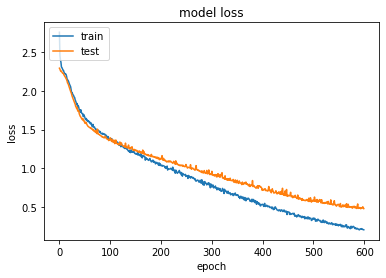

In [ ]:

plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_train_2, y_train_2, verbose=0)

In [ ]:
score[1]

0.9954426884651184

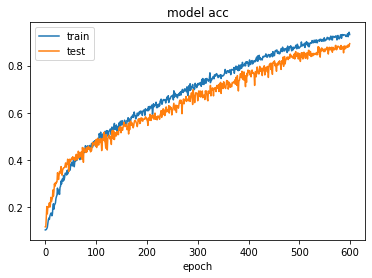

In [ ]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test_2, y_test_2, verbose=0)
score[1]*100

89.32291865348816

save model

In [ ]:
model_name = 'cnn_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/cnn_model.h5 


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/cnn_model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test_2, y_test_2, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 89.32%


In [ ]:
predictions = loaded_model.predict(X_test_2, batch_size=32, verbose=1)

12/12 [==============================] - 1s 42ms/step


In [ ]:
predictions

array([[9.7474912e-03, 6.7512369e-01, 1.0094101e-02, ..., 1.1466248e-03,
        2.1627230e-04, 4.2509355e-02],
       [5.0661532e-04, 5.5933852e-02, 1.5411654e-02, ..., 5.3237763e-06,
        5.6592880e-06, 1.0587815e-05],
       [1.1913354e-03, 8.2423940e-06, 2.6538388e-03, ..., 2.3279736e-06,
        1.4120923e-06, 5.6457297e-06],
       ...,
       [2.2045515e-05, 1.3610535e-06, 3.4188291e-05, ..., 5.4578239e-04,
        6.8726635e-04, 7.9699591e-02],
       [3.9802785e-07, 1.6382730e-08, 1.6801164e-07, ..., 5.6923940e-03,
        2.3299551e-02, 9.7050595e-01],
       [6.8775234e-03, 5.8725954e-04, 2.8337323e-04, ..., 1.2572768e-01,
        7.6447290e-01, 2.0210154e-03]], dtype=float32)

In [ ]:
predictions_1=predictions.argmax(axis=1)

In [ ]:
predictions_1

array([1, 4, 3, 7, 8, 2, 6, 3, 3, 6, 2, 4, 0, 0, 8, 8, 9, 0, 7, 9, 9, 7,
       1, 2, 0, 7, 0, 3, 5, 2, 6, 6, 0, 8, 5, 1, 8, 4, 3, 4, 5, 7, 6, 7,
       2, 1, 6, 1, 8, 4, 3, 5, 4, 5, 4, 9, 6, 9, 5, 1, 7, 0, 5, 1, 9, 7,
       9, 6, 4, 5, 8, 9, 9, 4, 2, 9, 5, 7, 1, 4, 7, 6, 4, 3, 9, 3, 7, 8,
       6, 5, 7, 3, 0, 1, 4, 8, 7, 7, 3, 1, 0, 9, 9, 1, 7, 1, 1, 6, 9, 1,
       0, 7, 0, 8, 5, 1, 9, 1, 0, 5, 6, 0, 2, 9, 3, 8, 7, 7, 5, 0, 2, 6,
       5, 1, 3, 0, 2, 1, 5, 7, 2, 7, 8, 3, 6, 3, 7, 1, 7, 4, 5, 8, 5, 4,
       1, 9, 8, 0, 8, 6, 6, 8, 2, 3, 2, 5, 3, 7, 1, 4, 8, 9, 8, 9, 8, 6,
       8, 0, 2, 8, 5, 6, 9, 6, 0, 3, 0, 0, 4, 6, 2, 9, 5, 1, 9, 0, 4, 3,
       2, 9, 8, 2, 1, 4, 9, 2, 2, 7, 8, 0, 0, 5, 4, 6, 6, 2, 6, 6, 0, 3,
       7, 3, 8, 7, 4, 6, 3, 4, 3, 7, 6, 9, 1, 2, 3, 2, 8, 6, 1, 9, 7, 4,
       8, 6, 5, 5, 9, 8, 4, 5, 9, 2, 1, 0, 3, 3, 5, 7, 5, 9, 1, 2, 8, 6,
       2, 7, 7, 0, 1, 6, 7, 2, 3, 5, 3, 1, 9, 1, 5, 7, 1, 2, 4, 1, 7, 7,
       2, 3, 6, 3, 9, 0, 8, 5, 5, 3, 1, 7, 5, 8, 9,

In [ ]:
predictions_2 = predictions_1.astype(int).flatten()

In [ ]:
predictions_3 = (le.inverse_transform((predictions_2)))

In [ ]:
predict_ds = pd.DataFrame({'predictedvalues': predictions_3})
predict_ds[:10]

,predictedvalues
0,female_calm
1,female_sad
2,female_happy
3,male_fearful
4,male_happy
5,female_fearful
6,male_calm
7,female_happy
8,female_happy
9,male_calm


In [ ]:
predict_ds.groupby('predictedvalues').count()

""
predictedvalues
female_angry
female_calm
female_fearful
female_happy
female_sad
male_angry
male_calm
male_fearful
male_happy


In [ ]:
actual=y_test_2.argmax(axis=1)

In [ ]:
actual

array([1, 4, 3, 7, 8, 2, 6, 3, 3, 6, 2, 4, 0, 0, 8, 8, 9, 0, 7, 9, 9, 9,
       1, 2, 0, 7, 0, 3, 5, 2, 5, 6, 0, 8, 0, 4, 8, 4, 3, 4, 5, 7, 6, 7,
       2, 1, 6, 9, 8, 4, 3, 5, 4, 8, 4, 9, 6, 9, 5, 1, 7, 7, 5, 1, 6, 7,
       9, 6, 4, 5, 8, 9, 9, 4, 2, 9, 5, 7, 1, 4, 7, 6, 1, 3, 9, 3, 8, 8,
       6, 5, 7, 3, 0, 1, 4, 8, 7, 7, 3, 4, 0, 9, 9, 1, 7, 1, 1, 9, 9, 1,
       0, 8, 0, 8, 5, 1, 9, 1, 0, 5, 5, 0, 2, 9, 3, 8, 7, 7, 8, 0, 2, 6,
       5, 1, 3, 0, 2, 1, 5, 7, 2, 7, 8, 3, 6, 3, 7, 1, 7, 4, 5, 8, 5, 4,
       1, 9, 8, 0, 8, 9, 6, 8, 2, 3, 2, 5, 3, 7, 4, 4, 8, 9, 8, 9, 8, 9,
       8, 0, 2, 8, 5, 6, 9, 6, 0, 3, 0, 0, 4, 6, 2, 9, 5, 1, 9, 0, 4, 3,
       2, 9, 8, 2, 1, 4, 9, 2, 2, 9, 8, 0, 0, 5, 4, 6, 6, 2, 6, 6, 0, 3,
       7, 3, 8, 7, 4, 6, 3, 4, 3, 7, 6, 5, 1, 2, 3, 2, 8, 6, 1, 9, 7, 4,
       8, 6, 5, 5, 9, 8, 4, 5, 9, 2, 1, 0, 3, 3, 5, 8, 0, 9, 1, 2, 8, 6,
       2, 7, 9, 7, 1, 6, 8, 2, 3, 5, 3, 4, 5, 4, 5, 8, 1, 2, 4, 1, 7, 7,
       2, 3, 9, 3, 9, 0, 8, 5, 5, 3, 1, 7, 5, 8, 9,

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actual,predictions_1)

In [ ]:
labels=['female_calm','female_sad','female_happy','male_fearful','male_happy','female_fearful','male_calm','female_happy','female_happy','male_calm']


Text(86.09375, 0.5, 'Actual')

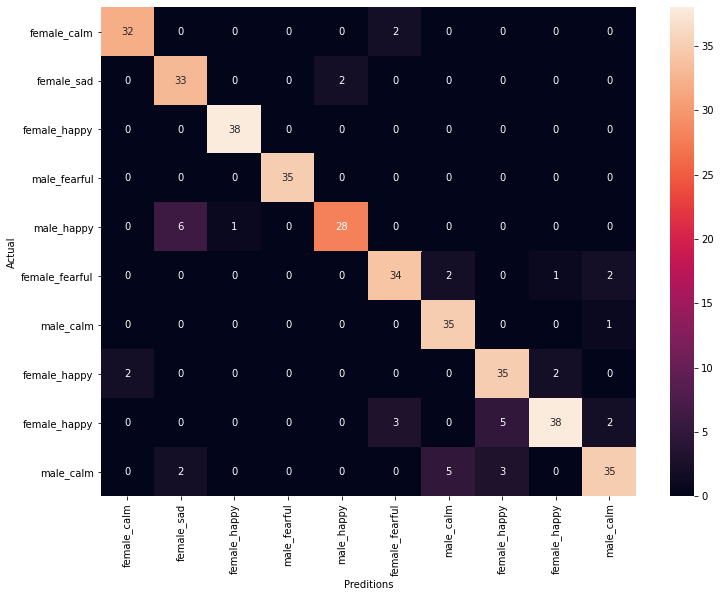

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 9))

sns.heatmap(cm, annot=True,xticklabels=labels,yticklabels=labels)
plt.xlabel('Preditions')
plt.ylabel('Actual')